$\textbf{PROGRAMMING ASSIGNMENT}$
---

Data: https://archive.ics.uci.edu.

Instruction: Choose a dataset and perform a data storytelling, choose the proper data visualization, do not use words, your graphs must tell a story.

In [1]:
# Library Imports
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# fetch dataset 
absenteeism_at_work = fetch_ucirepo(id=445) 
  
# data (as pandas dataframes) 
X = absenteeism_at_work.data.features 
y = absenteeism_at_work.data.targets 
  
# metadata 
print(absenteeism_at_work.metadata) 
  
# variable information 
print(absenteeism_at_work.variables) 


{'uci_id': 445, 'name': 'Absenteeism at work', 'repository_url': 'https://archive.ics.uci.edu/dataset/445/absenteeism+at+work', 'data_url': 'https://archive.ics.uci.edu/static/public/445/data.csv', 'abstract': 'The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 740, 'num_features': 19, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Education Level'], 'target_col': ['Absenteeism time in hours'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5X882', 'creators': ['Andrea Martiniano', 'Ricardo Ferreira'], 'intro_paper': {'title': 'Application of a neuro fuzzy network in prediction of absenteeism at work', 'authors': 'Andréa Martiniano, R. P. Ferre

In [3]:
print(X.columns)

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index'],
      dtype='object')


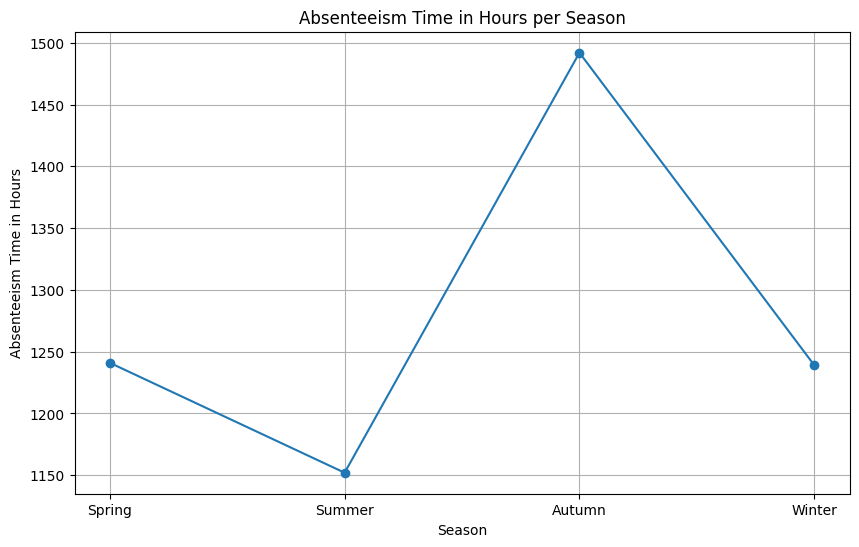

In [4]:
data = pd.concat([X, y], axis=1)

data.columns = [col.strip() for col in data.columns]
data.rename(columns={
    'Seasons': 'Season',
    'Absenteeism time in hours': 'Absenteeism_hours'
}, inplace=True)

seasonal_data = data.groupby('Season').sum()['Absenteeism_hours']

plt.figure(figsize=(10, 6))
seasonal_data.plot(marker='o', linestyle='-')
plt.title('Absenteeism Time in Hours per Season')
plt.xlabel('Season')
plt.ylabel('Absenteeism Time in Hours')
plt.xticks(seasonal_data.index, ['Spring', 'Summer', 'Autumn', 'Winter'])
plt.grid(True)
plt.show()

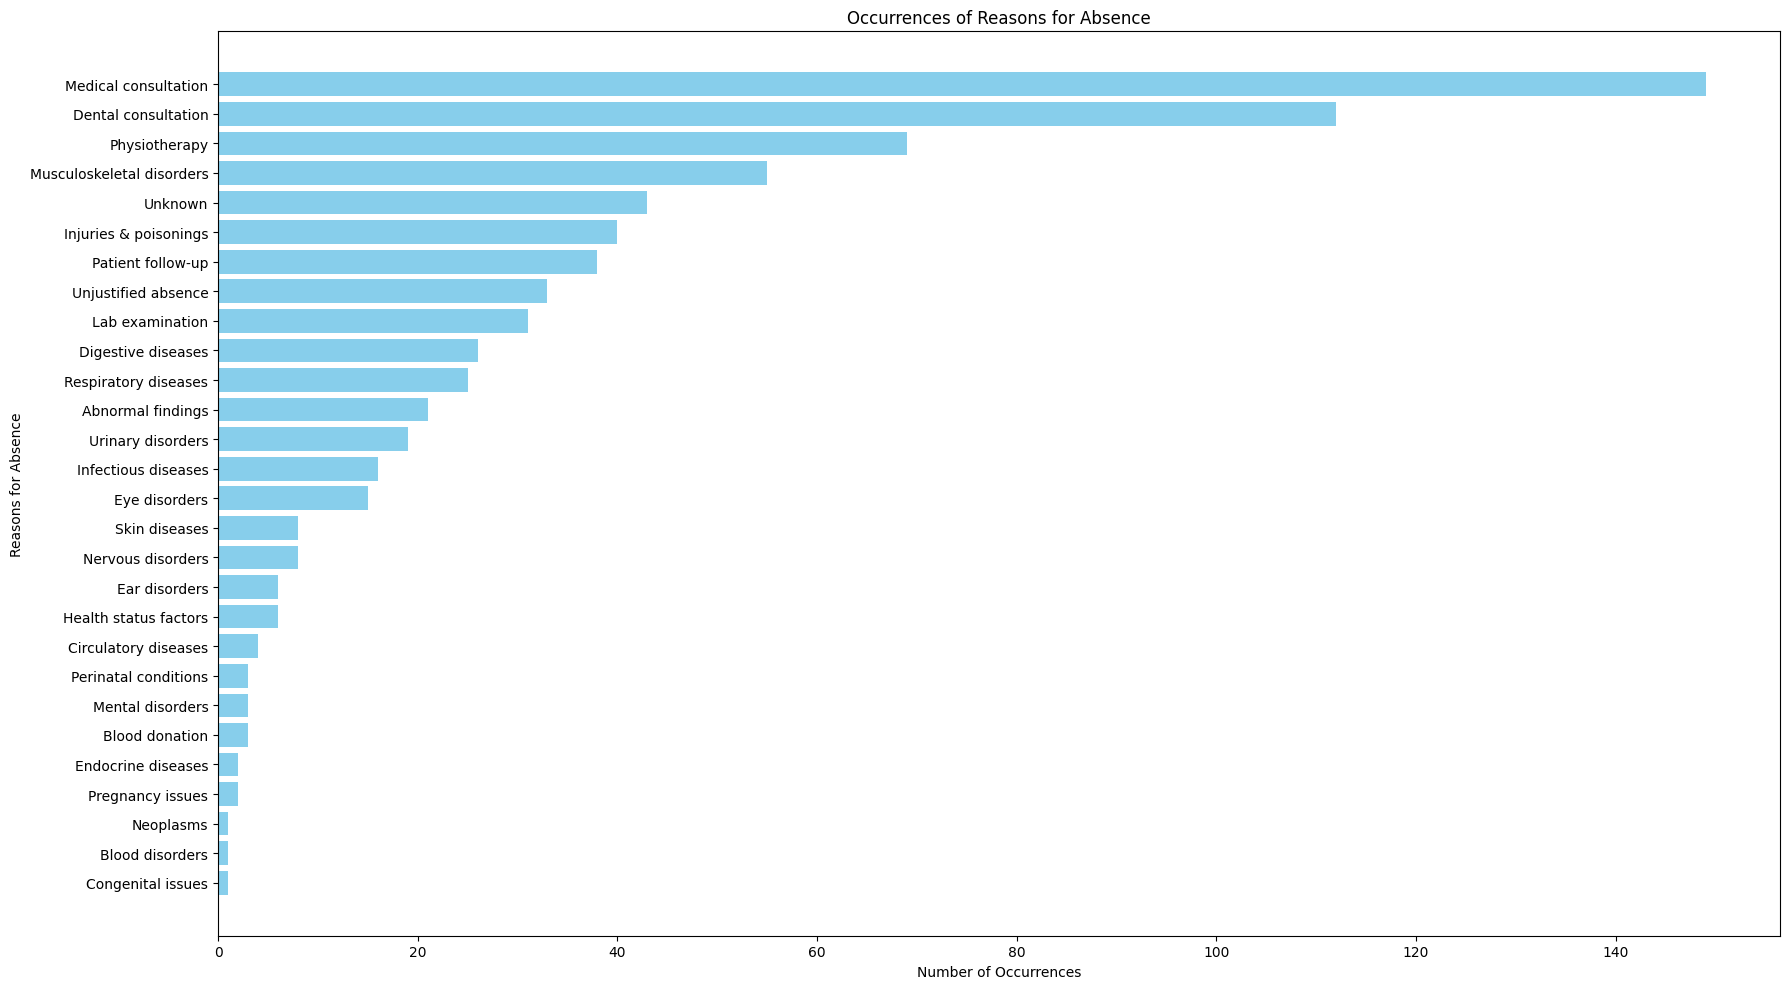

In [5]:
reasons = [17.0, 3.0, 15.0, 4.0, 21.0, 2.0, 9.0, 24.0, 18.0, 1.0, 12.0, 5.0, 16.0, 7.0, 27.0, 25.0, 8.0, 10.0, 26.0, 19.0, 28.0, 6.0, 23.0, 22.0, 13.0, 14.0, 11.0, 0.0]

X_np = np.array(X)

reason_counts = [np.sum(X_np[:, 0] == reason) for reason in reasons]

sorted_indices = np.argsort(reason_counts)
reasons_sorted = [reasons[i] for i in sorted_indices]
reason_counts_sorted = [reason_counts[i] for i in sorted_indices]

plt.figure(figsize=(18, 10))
bars = plt.barh(range(len(reasons_sorted)), reason_counts_sorted, color='skyblue')

plt.xlabel('Number of Occurrences')
plt.ylabel('Reasons for Absence')
plt.title('Occurrences of Reasons for Absence')

descriptions = {
    0.0: 'Unknown',
    1.0: 'Infectious diseases',
    2.0: 'Neoplasms',
    3.0: 'Blood disorders',
    4.0: 'Endocrine diseases',
    5.0: 'Mental disorders',
    6.0: 'Nervous disorders',
    7.0: 'Eye disorders',
    8.0: 'Ear disorders',
    9.0: 'Circulatory diseases',
    10.0: 'Respiratory diseases',
    11.0: 'Digestive diseases',
    12.0: 'Skin diseases',
    13.0: 'Musculoskeletal disorders',
    14.0: 'Urinary disorders',
    15.0: 'Pregnancy issues',
    16.0: 'Perinatal conditions',
    17.0: 'Congenital issues',
    18.0: 'Abnormal findings',
    19.0: 'Injuries & poisonings',
    21.0: 'Health status factors',
    22.0: 'Patient follow-up',
    23.0: 'Medical consultation',
    24.0: 'Blood donation',
    25.0: 'Lab examination',
    26.0: 'Unjustified absence',
    27.0: 'Physiotherapy',
    28.0: 'Dental consultation'
}

plt.yticks(range(len(reasons_sorted)), [descriptions[reason] for reason in reasons_sorted])

plt.gca().tick_params(axis='y', right=False)

plt.tight_layout()
plt.show()


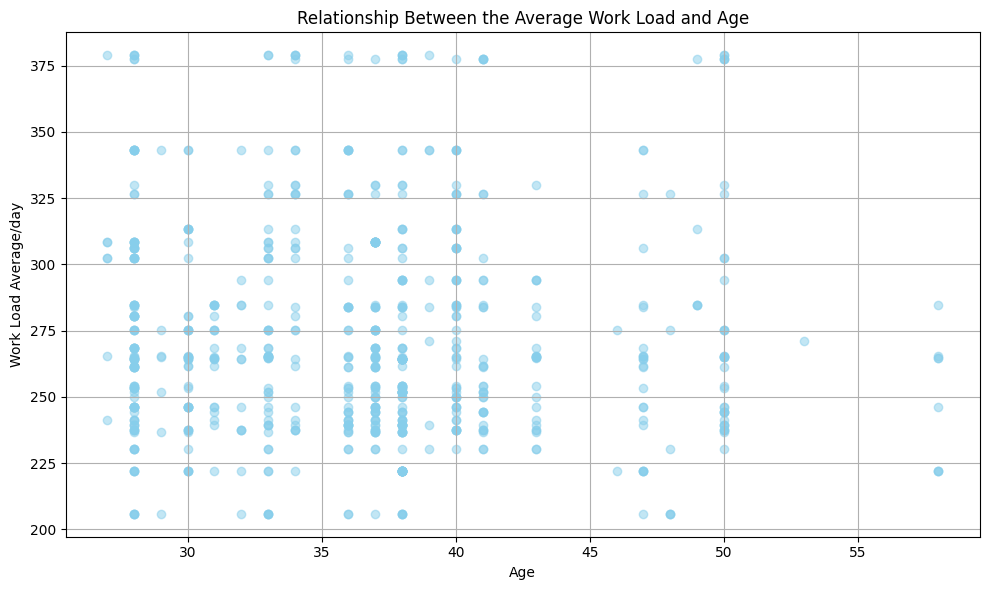

In [6]:
work_load = X['Work load Average/day ']
age = X['Age']

plt.figure(figsize=(10, 6))
plt.scatter(age, work_load, color='skyblue', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Work Load Average/day')
plt.title('Relationship Between the Average Work Load and Age')

plt.grid(True)
plt.tight_layout()
plt.show()

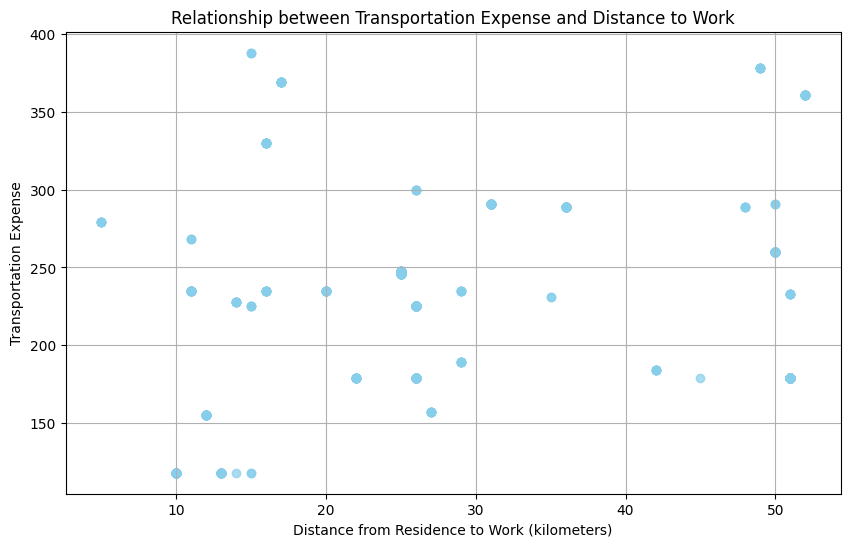

In [7]:
transportation_expense = absenteeism_at_work.data.features['Transportation expense']
distance_to_work = absenteeism_at_work.data.features['Distance from Residence to Work']

plt.figure(figsize=(10, 6))
plt.scatter(distance_to_work, transportation_expense, color='skyblue', alpha=0.7)
plt.title('Relationship between Transportation Expense and Distance to Work')
plt.xlabel('Distance from Residence to Work (kilometers)')
plt.ylabel('Transportation Expense')
plt.grid(True)
plt.show()


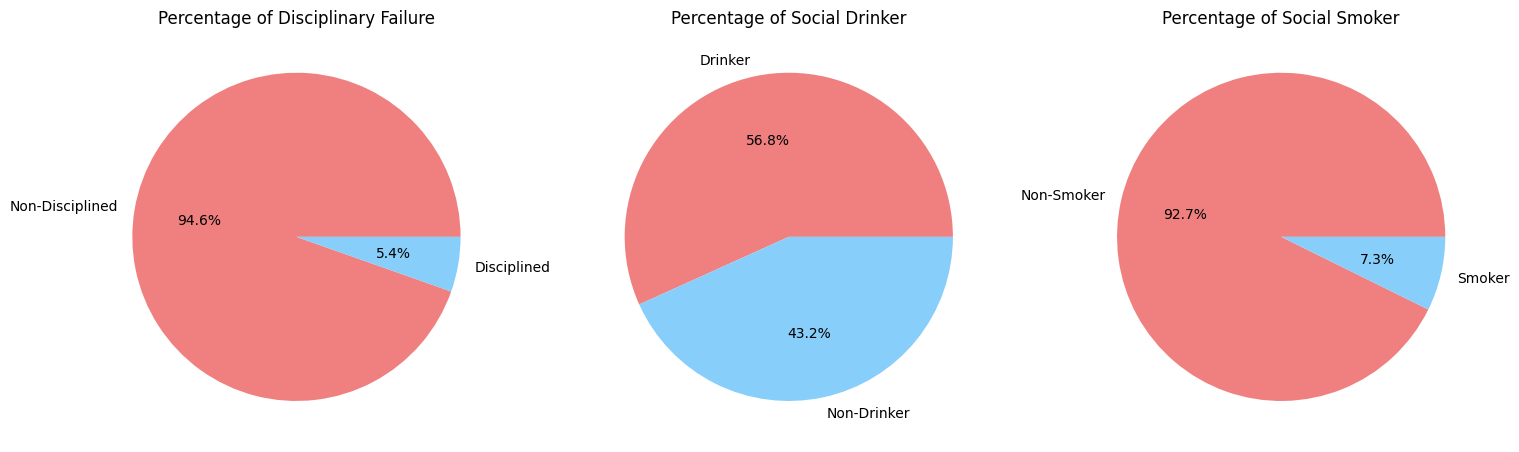

In [8]:
disciplinary_labels = {0: 'Non-Disciplined', 1: 'Disciplined'}
social_drinker_labels = {0: 'Non-Drinker', 1: 'Drinker'}
social_smoker_labels = {0: 'Non-Smoker', 1: 'Smoker'}

disciplinary_failure_counts = X['Disciplinary failure'].value_counts()
social_drinker_counts = X['Social drinker'].value_counts()
social_smoker_counts = X['Social smoker'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].pie(disciplinary_failure_counts, labels=[disciplinary_labels[val] for val in disciplinary_failure_counts.index], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
axes[0].set_title('Percentage of Disciplinary Failure')

axes[1].pie(social_drinker_counts, labels=[social_drinker_labels[val] for val in social_drinker_counts.index], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
axes[1].set_title('Percentage of Social Drinker')

axes[2].pie(social_smoker_counts, labels=[social_smoker_labels[val] for val in social_smoker_counts.index], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
axes[2].set_title('Percentage of Social Smoker')

plt.show()


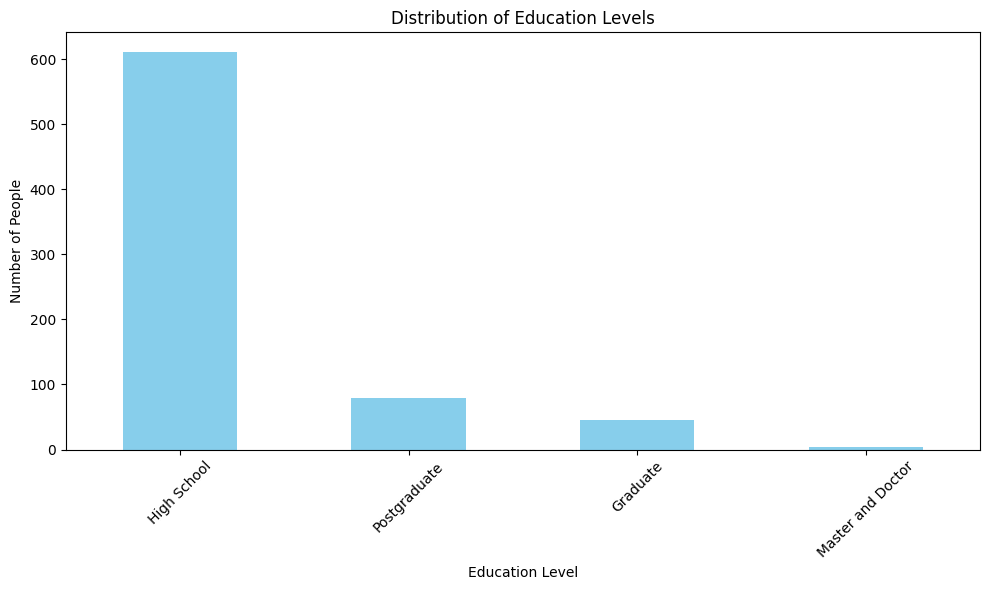

In [9]:
pd.options.mode.chained_assignment = None
absenteeism_at_work = fetch_ucirepo(id=445) 
X = absenteeism_at_work.data.features 

education_mapping = {
    1: 'High School',
    2: 'Graduate',
    3: 'Postgraduate',
    4: 'Master and Doctor'
}

X.loc[:, 'Education_Level'] = X['Education'].map(education_mapping)

education_counts = X['Education_Level'].value_counts()

plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Number of People')
plt.title('Distribution of Education Levels')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()